In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("C:/Users/subik/Downloads/bank+marketing (2)/bank-additional/bank-additional/bank-additional-full.csv",sep=';')

In [51]:
print(df.head(3))

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]


In [53]:
df_encoded = pd.get_dummies(df)

In [55]:
X = df_encoded.drop('y_no', axis=1)  
y = df_encoded['y_yes']  

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [61]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [63]:
y_pred = clf.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     10968
        True       1.00      1.00      1.00      1389

    accuracy                           1.00     12357
   macro avg       1.00      1.00      1.00     12357
weighted avg       1.00      1.00      1.00     12357

Confusion Matrix:
 [[10968     0]
 [    0  1389]]


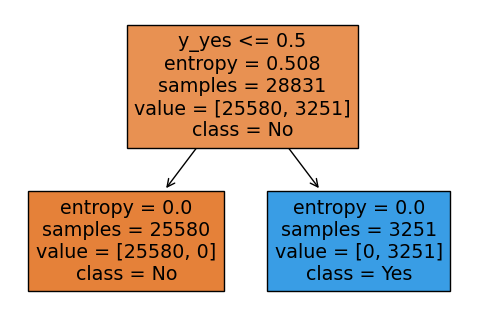

In [69]:
plt.figure(figsize=(6, 4))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()